# PSO
## Díaz Alvarado Daniel Alejandro - Zavaleta Guerrero Joshua Iván
## Particle Swarm Optimization

This is a metaheuristic algorithm inspired by the social behavior of birds flocking or fish schooling.

A group of solutions (particles) moves around the search space. Each particle has a position and a velocity (direction and speed of movement). At each iteration, particles update their velocity and position based on:

- Their personal best position (the best solution they've found so far).

- The global best position (the best solution found by any particle).

## When is it useful? 

- The objective function is non-linear, non-differentiable, or has many local minima, where traditional gradient-based methods fail.

- You don't have acces to the derivative of the function (You can’t calculate how much the output changes with small changes in the input — i.e., the gradient or like a simulation or a neural network).

- You need to optimize continous parameters.

## Advantages

- Simple to implement and tune.

- Few parameters to adjust.

- Works for nonlinear, non-convex or noisy problems.

## Disadvantages

- Can get stuck in local minima in complex landscapes.

- Performance can degrade in high-dimensional spaces.

- Sensitive to parameter settings (too much or too little exploration).

## Parameters
- Number of particles.

- Inertia: controls how much of the previous velocity is kept which (balances exploration vs exploitation).

- b1: cognitive coefficient. How much a particle trusts its own best position.

- b2: social coefficient. How much a particle trusts the swarm's global best.

- Iterations.

- Velocity limits and position bounds (optional): to prevent particles from going too far.

In [2]:
import random as rand
import numpy as np

In [3]:
# Variables importantes

iteraciones = 50
a = 0.8 # Inercia
b1 = 0.7 # Aprendizaje local
b2 = 1.2 # Aprendizaje global
numero_particulas = 20
particulas = [[0,0]]*numero_particulas
velocidades = [[0,0]]*(numero_particulas+1)


In [4]:
# Inicializar posición
def posicion_inicial():
    x = rand.uniform(-5,5)
    y = rand.uniform(-5,5)
    return x,y

In [5]:
# Evaluar aptitud
def evaluar_funcion(x, y):
    return x**2 + y**2 + 25 * (np.sin(x) + np.sin(y))

In [6]:
# Determinar pbest
def determinar_pbest(pbest_anterior, fitness):
    if pbest_anterior[0] <= fitness[0]:
        return pbest_anterior

    return fitness

In [7]:
# Calcular velocidades
def calcular_velocidades(particula,velocidades, gbest, pbest):
    gbestx = gbest[1]
    gbesty = gbest[2]
    pbestx = pbest[1]
    pbesty = pbest[2]
    x,y = particula
    vx = velocidades[0]
    vy = velocidades[1]
    
    r1 = rand.uniform(0,1)
    r2 = rand.uniform(0,1)
    
    vx = a * vx + b1 * r1 * (pbestx - x) + b2 * r2 * (gbestx - x)
    vy = a * vy + b1 * r1 * (pbesty - y) + b2 * r2 * (gbesty - y)
    
    return (vx, vy)

In [8]:
# Calcular nuevas posiciones
def actualizar_posicion(particula, velocidades):
    x, y = particula
    vx = velocidades[0]
    vy = velocidades[1]
    
    x += vx
    y += vy
    
    if x < -5:
        x = -5
    elif 5 < x:
        x = 5
        
    if y < -5:
        y = -5
    elif 5 < y:
        y = 5
    
    return x, y

In [9]:
fitness = [[0,0,0]]*numero_particulas
pbest = []
gbest = [0,0,0]
mejor_particula = 0

for i in range(numero_particulas):
    x, y = posicion_inicial()
    particulas[i] = [x,y]
    pbest.append([evaluar_funcion(x,y), x,y])

gbest = pbest[0]

for i in range(iteraciones):
    
    print(f"ITERACIÓN: {i}\n")
    print(f"POSICIONES DE LAS PARTÍCULAS:")

    for j,particula in enumerate(particulas):
        print(f"Partícula {j}: ({particula[0]}, {particula[1]})")
        x,y= particula
        fitness[j] = (evaluar_funcion(x,y),x,y)

    print("\nPBEST:")
    # Determinar pbest y gbest
    for k in range(numero_particulas):
        pbest[k] = determinar_pbest(pbest[k], fitness[k])
        if pbest[k][0] < gbest[0]:
            gbest = pbest[k]
            if i == 49:
                mejor_particula = k
        print(f"Pbest partícula {k}: {pbest[k][0]}, ({pbest[k][1]}, {pbest[k][2]})")
        
    print(f"\nGBEST: {gbest[0]}, ({gbest[1]}, {gbest[2]})")
    
    print("\nVELOCIDADES:")
    
    for i, particula in enumerate(particulas):
        velocidades[i+1] = calcular_velocidades(particula, velocidades[i], gbest, pbest[i])
        print(f"Velocidad de la partícula {i}: Vx: {velocidades[i+1][0]} Vy: {velocidades[i+1][1]}")
        x, y = actualizar_posicion(particula, velocidades[i+1])
        particula[0] = x
        particula[1] = y
        
#  Escoger a la mejor partícula
print(f"\nMEJOR PARTÍCULA: {mejor_particula} en la posición ({gbest[1]}, {gbest[2]})")

ITERACIÓN: 0

POSICIONES DE LAS PARTÍCULAS:
Partícula 0: (3.521982304565098, -1.6828202066628837)
Partícula 1: (2.854806202741262, 2.228825522559208)
Partícula 2: (3.400269788154862, 3.3280052739034147)
Partícula 3: (4.335930782935918, -0.05171228447977505)
Partícula 4: (0.012049138903071466, -3.819922578979215)
Partícula 5: (-3.5827344728992303, 3.2255676252698393)
Partícula 6: (1.4866081018247632, 1.1429423833179033)
Partícula 7: (2.5259845760318154, -0.2121601019174406)
Partícula 8: (3.3449663382087795, -0.4572259302249009)
Partícula 9: (0.9499422253716547, 0.9315947264581546)
Partícula 10: (2.289295773880598, -3.252441600306698)
Partícula 11: (2.351870582923043, -2.5148441007303077)
Partícula 12: (0.2933582305774243, -0.8178693879328023)
Partícula 13: (-3.8185594955491178, 4.946250088923815)
Partícula 14: (2.6258782779963807, -1.8579441090150128)
Partícula 15: (3.609418980340255, 1.270910107955494)
Partícula 16: (-2.1490772076110543, -2.3931275130088494)
Partícula 17: (-1.816067911

In [10]:
# Función para comprobar el resultado
from scipy.optimize import minimize

def f_obj(vars):
    x, y = vars
    return x**2 + y**2 + 25 * (np.sin(x) + np.sin(y))

res = minimize(f_obj, [0, 0], method='BFGS') # Función a minimizar, en qué "coordenadas" empezar a buscar, algoritmo Broyden, Fletcher, Goldfarb y Shanno


print("scipy:", res.x, res.fun) 


scipy: [-1.45419657 -1.45419657] -45.43112199357747


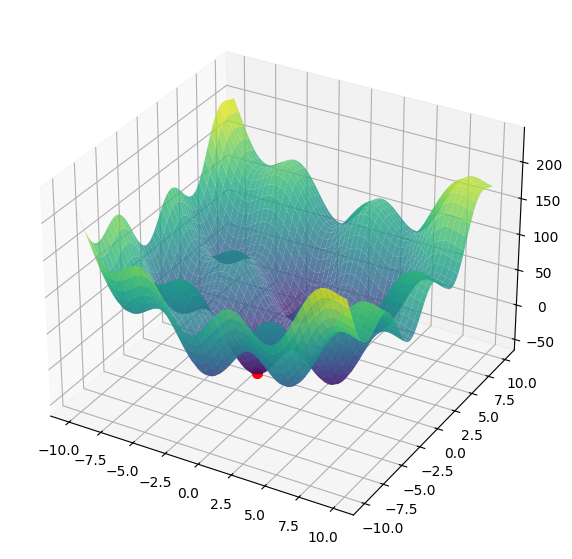

In [11]:
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 200) # 200 números espaciados uniformemente entre -10 y 10
Y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(X, Y) # Toma esos dos vectores y los convierte en dos matrices (cuadrículas) 2D. La nueva matriz X tendrá 200 filas, y cada fila será una copia del vector X original, lo mismo sucede con Y, pero con columnas
Z = X**2 + Y**2 + 25*(np.sin(X) + np.sin(Y))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d') # Crea el lienzo 3D vacío donde vas a dibujar.
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8) # Dibuja la gráfica
valor, x_best, y_best = gbest

ax.scatter(x_best, y_best, valor, color='red', s=50)
plt.show()
